# U.S. Medical Insurance Costs

This analysis is a capstone project for the Codecademy "Data Scientist: Machine Learning" career path.

The focal point of this analysis is a medical insurance dataset, provided by Codecademy. This document is structured into several key sections, beginning with a detailed descriptive analysis, followed by an in-depth exploratory analysis. To enable the formulation of accurate future charge predictions, a regression model has been developed. This model is specifically designed to generate reliable predictions based on new data inputs.

## Import Libraries

In [87]:
# Import pandas for data handling and analyis
import pandas as pd

# Import matplotlib and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn and LinearRegression for predictive model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

## Data Loading and Exploration

In [88]:
# Load raw data file "insurance.csv"
insurance_data = pd.read_csv("insurance.csv")

In [89]:
# Explore first few rows of the insurance dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
# Get the number of entries we have in the dataset
insurance_data.shape[0]

1338

The preliminary investigation of the data file shows that the csv-file contains data of 1,338 entries. Data is recorded for the following variables:
* "age": Age of the insurance policyholder
* "sex": Gender of the insured person - male / female
* "bmi": Body Mass Index of the insured person
* "children": Number of children of the insured person
* "smoker": yes / no
* "region": area of residence of the insured person in the United States
* "charges": amount billed by insurance in USD

In [91]:
# Explore mean, std, min, max, count to get a better overview of the data
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The descriptive statistics show that:

* Age: Ranges from 18 to 64 years with an average of approximately 39 years.
* BMI (Body Mass Index): Varies between 15.96 and 53.13 with a mean value around 30.66.
* Children: The number of children/dependents ranges from 0 to 5, with an average of about 1.09.
* Charges: The individual medical costs billed by health insurance range from about $1,121 to $63,770, with an average cost of around $13,270.

In [92]:
# Verify if there are missing values in the dataset
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset.

## Visual Exploration

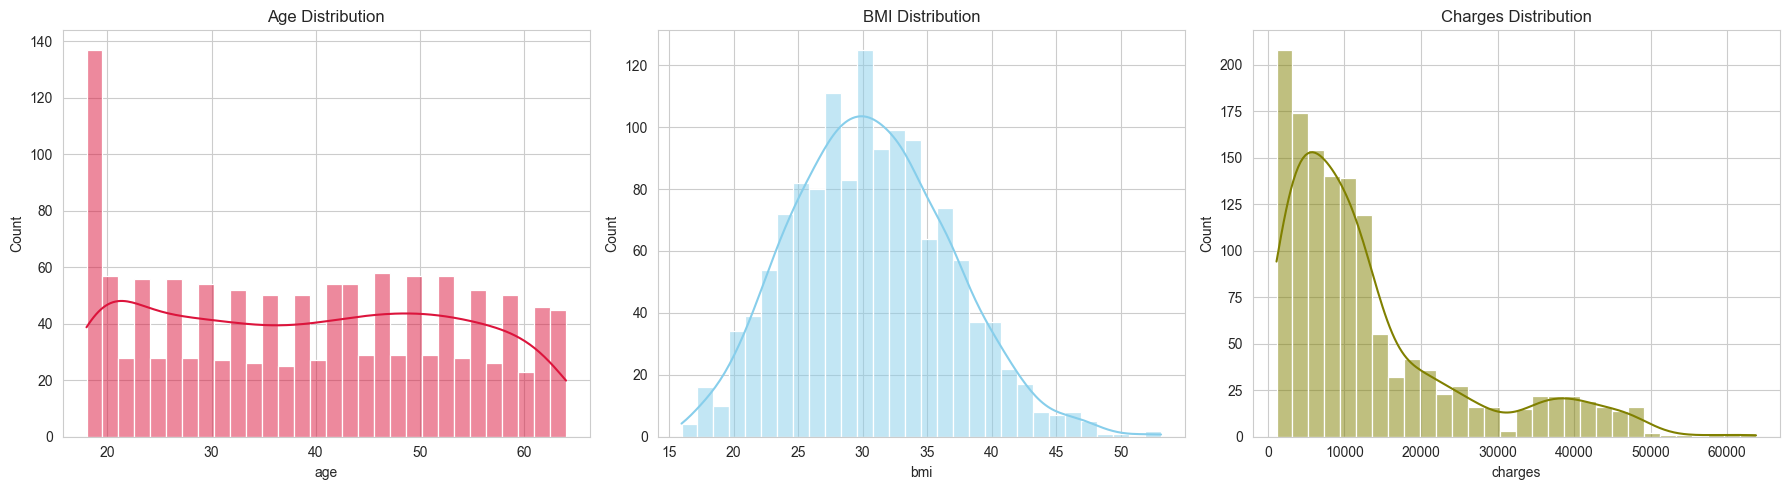

In [93]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Age, BMI, and Charges
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Age
sns.histplot(insurance_data["age"], bins=30, ax=axes[0], kde=True, color="crimson")
axes[0].set_title("Age Distribution")

# Plot for BMI
sns.histplot(insurance_data["bmi"], bins=30, ax=axes[1], kde=True, color="skyblue")
axes[1].set_title("BMI Distribution")

# Plot for Charges
sns.histplot(insurance_data["charges"], bins=30, ax=axes[2], kde=True, color="olive")
axes[2].set_title("Charges Distribution")

plt.tight_layout()
plt.show()

### Distribution of Key Variables

* __Age Distribution__: The age distribution appears to be fairly uniform, indicating a diverse age range of beneficiaries.
* __BMI Distribution__: The BMI distribution is approximately normally distributed, centering around the mean of 30.66. This suggests a typical representation of BMI values across the dataset.
* __Charges Distribution__: The charges are right-skewed, indicating that while most individuals incur lower medical costs, there is a significant number of individuals with very high medical costs.

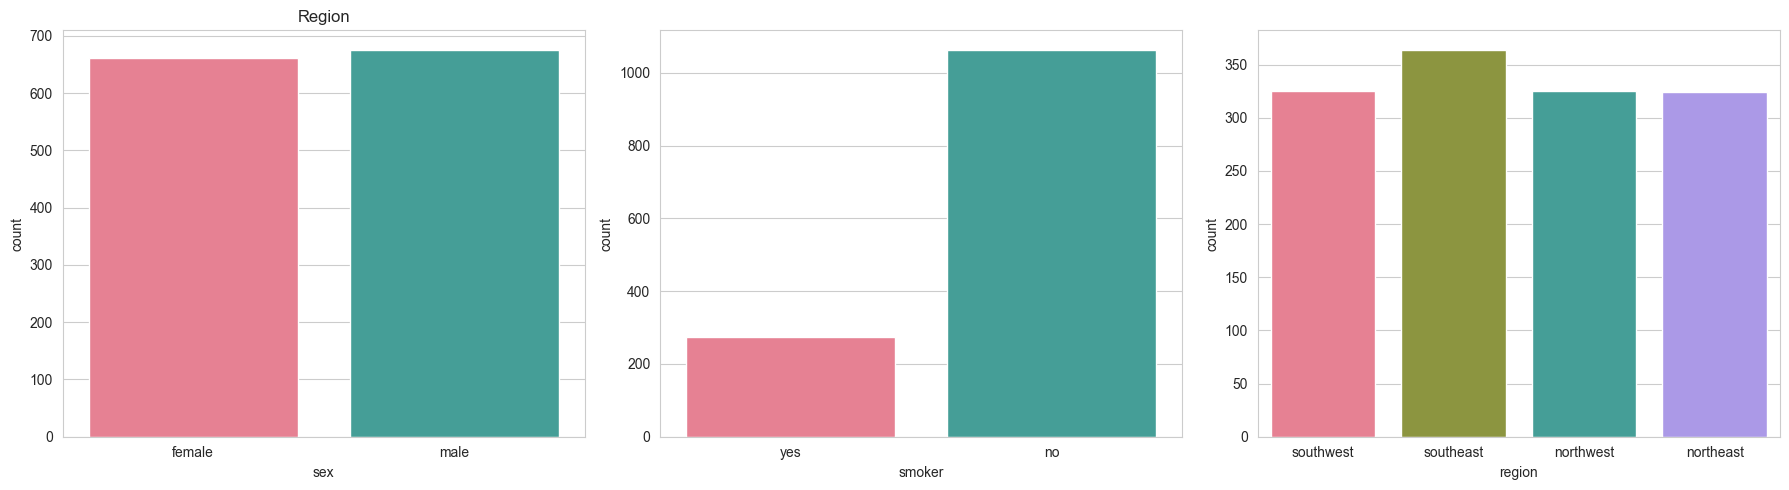

In [94]:
# Count plots for categorical variables (sex, smoker, region)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for gender
sns.countplot(insurance_data, x="sex", ax=axes[0], palette="husl")
axes[0].set_title("Sex Distribution")

# Plot for smoker or non-smoker
sns.countplot(insurance_data, x="smoker", ax=axes[1], palette="husl")
axes[0].set_title("Smoker")

sns.countplot(insurance_data, x="region", ax=axes[2], palette="husl")
axes[0].set_title("Region")

plt.tight_layout()
plt.show()

### Distribution of Categorical Information

* __Sex Distribution__: The distribution between males and females appears to be nearly balanced.
* __Smoker Distribution__: A smaller proportion of the beneficiaries are smokers compared to non-smokers.
* __Region Distribution__: The beneficiaries are fairly evenly distributed across the four regions, with a slight variation.

## Correlation Matrix

A correlation matrix provides a quick overview how the numerical values in the dataset relate to insurance charges claimed by insurance companies. A strong relationshop would have a value close to 1, whereas a weaker relationship would be closer to 0.

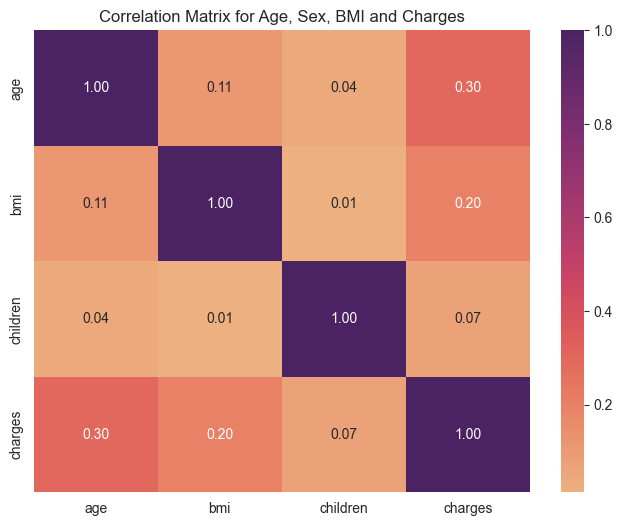

In [95]:
# Extract only numerical data from the dataset for the correlation matrix
numerical_data = insurance_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical data
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix for Age, Sex, BMI and Charges')
plt.show()

The correlation matrix provides the following insights:

* None of the numerical variables show a strong correlation with "charges".
* __Age and Charges__: There is a moderate positive correlation (approximately 0.30) between age and charges, suggesting that older individuals tend to incur higher medical costs.
* __BMI and Charges__: There is also a moderate positive correlation (around 0.20) between BMI and charges, indicating that higher BMI may be associated with increased medical costs.
* __Children and Charges__: The correlation between the number of children and charges is relatively low (around 0.07), suggesting a very weak relationship between these variables and the number of children does not have any effect on insurance costs.

Next, I will perform a group analysis to further explore how categorical variables such as smoking status, gender, and region influence medical charges. This analysis will help in understanding if certain categories of beneficiaries have significantly different medical costs.

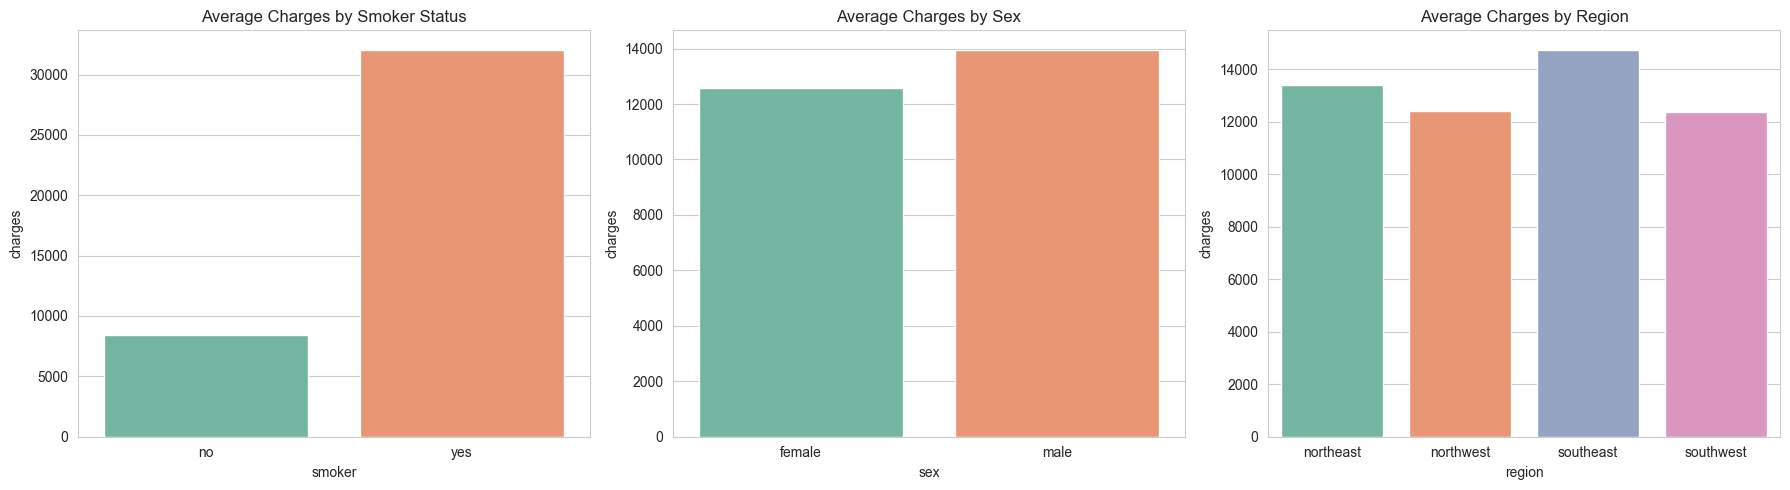

In [96]:
# Group analysis for categorical variables: 'smoker', 'sex', and 'region'

# Average charges by smoker status
avg_charges_smoker = insurance_data.groupby('smoker')['charges'].mean().reset_index()

# Average charges by sex
avg_charges_sex = insurance_data.groupby('sex')['charges'].mean().reset_index()

# Average charges by region
avg_charges_region = insurance_data.groupby('region')['charges'].mean().reset_index()

# Creating plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Smoker vs Charges
sns.barplot(x='smoker', y='charges', data=avg_charges_smoker, ax=axes[0], palette='Set2')
axes[0].set_title('Average Charges by Smoker Status')

# Plot for Sex vs Charges
sns.barplot(x='sex', y='charges', data=avg_charges_sex, ax=axes[1], palette='Set2')
axes[1].set_title('Average Charges by Sex')

# Plot for Region vs Charges
sns.barplot(x='region', y='charges', data=avg_charges_region, ax=axes[2], palette='Set2')
axes[2].set_title('Average Charges by Region')

plt.tight_layout()
plt.show()

* __Average Charges by Smoker Status__: There is a significant difference in average charges between smokers and non-smokers. Smokers tend to incur much higher medical costs on average compared to non-smokers.
* __Average Charges by Sex__: The average charges differ slightly between males and females, with males incurring slightly higher costs on average. However, this difference is not as pronounced as in the case of smokers vs. non-smokers.
* __Average Charges by Region__: There are variations in average charges across different regions, though these differences are less marked compared to the smoker status. The southeast region shows a somewhat higher average charge, which might be worth investigating further.

From these findings, it's clear that __smoking__ status is a significant factor in determining medical charges. Age and BMI also play notable roles, as seen in the correlation analysis. While there are differences based on sex and region, they are less pronounced compared to smoking status.

## Logistic Regression Model and Predictive Model

In [97]:
# Data Preparation
# Encoding the 'smoker' column to binary format
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})

# Selecting features and target variable
X = insurance_data[['charges']]  # Independent variable
y = insurance_data['smoker']     # Dependent variable (target)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting on Test Set
y_pred = logistic_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

accuracy, classification_rep, roc_auc

(0.917910447761194,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95       214\n           1       0.83      0.74      0.78        54\n\n    accuracy                           0.92       268\n   macro avg       0.88      0.85      0.87       268\nweighted avg       0.92      0.92      0.92       268\n',
 0.9816545517480096)

* Accuracy: Approximately 91.79%. This indicates the proportion of total predictions that were correct.

Classification Report:
* For non-smokers (0): Precision is about 94%, and recall is 96%.
* For smokers (1): Precision is around 83%, and recall is 74%.

These metrics provide insight into the model's ability to correctly identify smokers and non-smokers.
* ROC AUC Score: Approximately 0.982. The ROC AUC score is a performance measurement for the classification problems at various threshold settings. A score close to 1 indicates a high level of model performance.

Interpretation

The high accuracy and ROC AUC score suggest that the model is performing well in distinguishing between smokers and non-smokers based on their medical charges.

The precision and recall values indicate the model's reliability; it's more reliable in predicting non-smokers than smokers.
However, as with any model, consider the possibility of overfitting and the need for further validation, perhaps with a different dataset or cross-validation.

This model provides a good baseline for understanding the relationship between medical charges and smoking status. You can use it to predict the likelihood of someone being a smoker based on their medical expenses.

In [98]:
import numpy as np

# Test Case 1: Lower medical charges (e.g., $3,000)
test_case_1 = np.array([[3000]])

# Test Case 2: Higher medical charges (e.g., $30,000)
test_case_2 = np.array([[30000]])

# Predicting with the logistic regression model
predicted_prob_1 = logistic_model.predict_proba(test_case_1)[0][1]  # Probability of being a smoker
predicted_prob_2 = logistic_model.predict_proba(test_case_2)[0][1]  # Probability of being a smoker

print("Probability of being a smoker (Test Case 1 - Lower Charges):", predicted_prob_1)
print("Probability of being a smoker (Test Case 2 - Higher Charges):", predicted_prob_2)


Probability of being a smoker (Test Case 1 - Lower Charges): 0.007756464798162092
Probability of being a smoker (Test Case 2 - Higher Charges): 0.8654626387100867


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
